**PCA, RandomForest, DecisionTree Classifier, and FeatureImportance**

In [1]:
#importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import  GridSearchCV

In [3]:
#loading the transformed Data Set
solar_data = pd.read_csv(r"C:\Users\bathl\OneDrive\Documents\SJSU\Machine_Learning\Project\solar_data_transformed18.csv")

In [5]:
# Exclude the target and ID column from the PCA analysis
X = solar_data.drop(['InstallType','ID'], axis=1)

# Instantiate a PCA object
pca = PCA()

# Fit the PCA object to the features of the dataframe
pca.fit(X)

PCA()

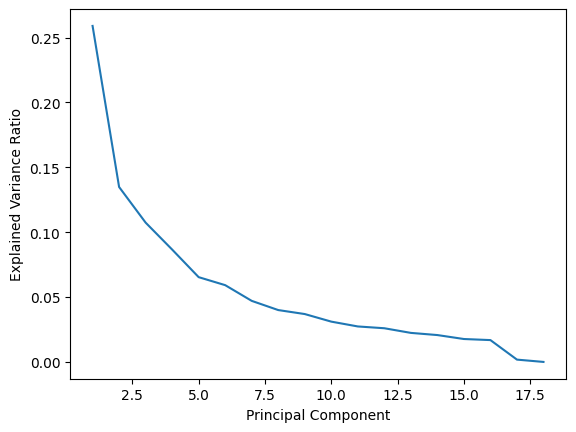

In [7]:
# Plot the explained variance ratio for each principal component
plt.plot(range(1, pca.n_components_+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [9]:
explained_variance = pca.explained_variance_

# Calculate the percentage of explained variance of each principal component
explained_variance_ratio = explained_variance / sum(explained_variance) * 100

# Print the percentage of explained variance of each principal component
for i, variance in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {variance:.2f}%")

PC1: 25.90%
PC2: 13.48%
PC3: 10.74%
PC4: 8.66%
PC5: 6.53%
PC6: 5.92%
PC7: 4.71%
PC8: 4.00%
PC9: 3.69%
PC10: 3.11%
PC11: 2.73%
PC12: 2.60%
PC13: 2.24%
PC14: 2.07%
PC15: 1.77%
PC16: 1.68%
PC17: 0.18%
PC18: 0.00%


We won't do PCA as it does not have high variance

Random Forest Accuracy: 0.9358024691358025
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       647
           1       0.91      0.94      0.93       416
           2       0.94      0.91      0.93       557

    accuracy                           0.94      1620
   macro avg       0.93      0.94      0.93      1620
weighted avg       0.94      0.94      0.94      1620



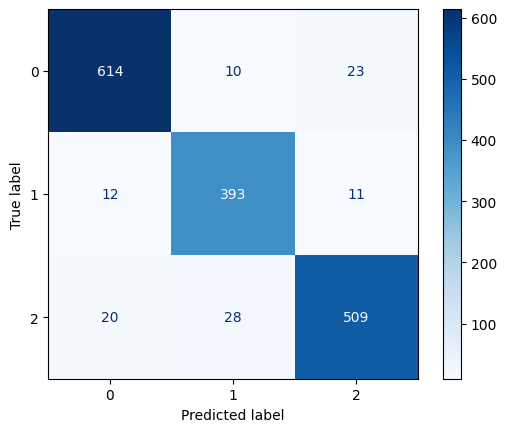

In [12]:
# Prepare data for classification
X_train, X_test, y_train, y_test = train_test_split(X, solar_data['InstallType'], test_size=0.3, random_state=42)

# Step 2: Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)

conf_matrix = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

In [14]:
# Random Forest Tuning
rf_param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [10, 20,30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

Tuned Random Forest Accuracy: 0.9364197530864198
Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       647
           1       0.91      0.94      0.93       416
           2       0.94      0.91      0.93       557

    accuracy                           0.94      1620
   macro avg       0.93      0.94      0.93      1620
weighted avg       0.94      0.94      0.94      1620


Confusion Matrix:
 [[617  10  20]
 [ 11 392  13]
 [ 20  29 508]]


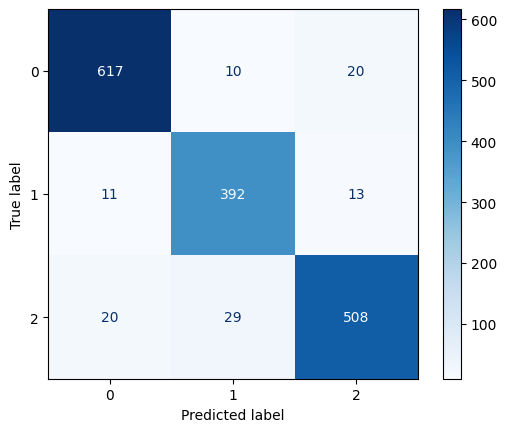

In [16]:
# Best parameters and performance
best_rf = rf_grid_search.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)
rf_tuned_accuracy = accuracy_score(y_test, y_pred_rf_tuned)
rf_tuned_report = classification_report(y_test, y_pred_rf_tuned)

print("Tuned Random Forest Accuracy:", rf_tuned_accuracy)
print("Tuned Random Forest Classification Report:\n", rf_tuned_report)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_tuned))

conf_matrix = confusion_matrix(y_test, y_pred_rf_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

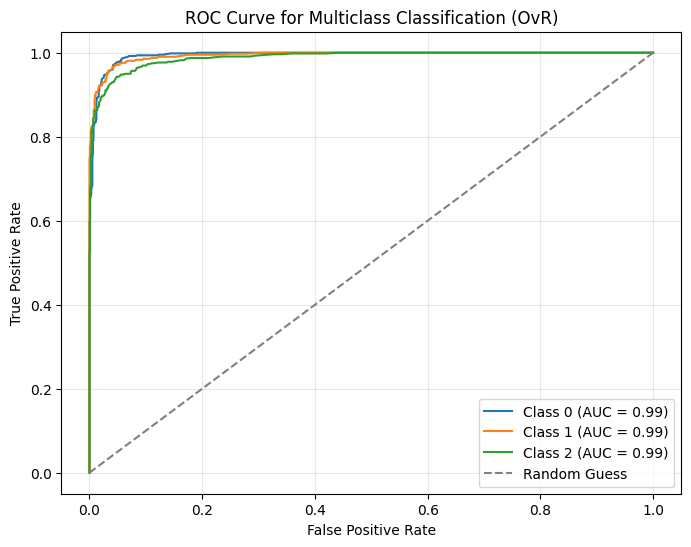

In [18]:
# Ensure classes are correctly labeled and binarized
n_classes = len(best_rf.classes_)  # Number of classes
y_test_bin = label_binarize(y_test, classes=best_rf.classes_)  # Binarize y_test

# Ensure probabilities are available for all classes
y_prob = best_rf.predict_proba(X_test)  # Predicted probabilities

# Plotting the ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])  # Compute FPR and TPR
    roc_auc = auc(fpr, tpr)  # Compute AUC
    plt.plot(fpr, tpr, label=f"Class {best_rf.classes_[i]} (AUC = {roc_auc:.2f})")

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")

# Customize the plot
plt.title("ROC Curve for Multiclass Classification (OvR)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

**RandomForest Insights**

The tuned Random Forest model performs slightly better than the initial model, indicating that hyperparameter optimization indeed increased the effectiveness of this model.

1. Accuracy improved from 93.58% to 93.64%, indicating fine-tuning has reduced minor classification errors.
2. Precision, Recall, and F1-scores are all around 0.94, indicating consistent performance across all classes.
3. These metrics remain robust even after tuning, maintaining balance across the dataset.

Decision Tree Accuracy: 0.9104938271604939
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       647
           1       0.92      0.88      0.90       416
           2       0.89      0.91      0.90       557

    accuracy                           0.91      1620
   macro avg       0.91      0.91      0.91      1620
weighted avg       0.91      0.91      0.91      1620



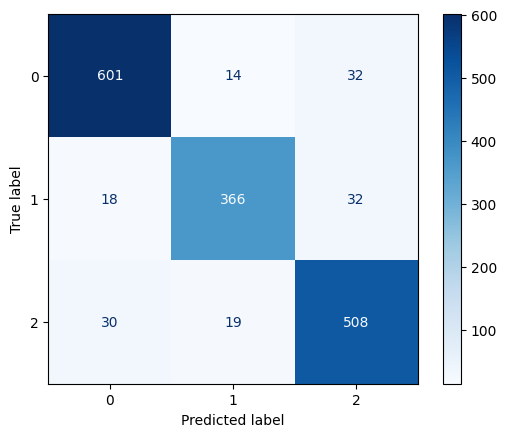

In [22]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate Decision Tree
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", dt_report)

conf_matrix = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

In [24]:
# Decision Tree Tuning
dt_param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'] 
}

dt_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=dt_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Tuned Decision Tree Accuracy: 0.904320987654321
Tuned Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       647
           1       0.91      0.89      0.90       416
           2       0.89      0.88      0.88       557

    accuracy                           0.90      1620
   macro avg       0.90      0.90      0.90      1620
weighted avg       0.90      0.90      0.90      1620



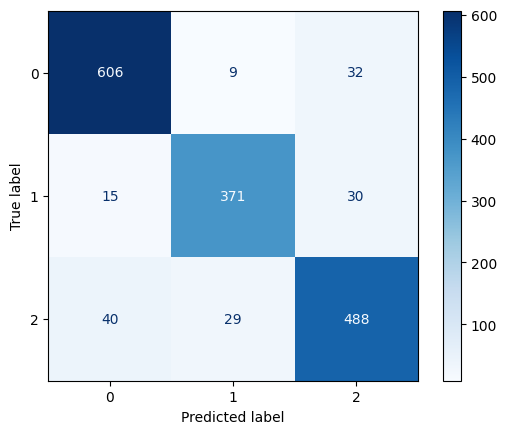

In [26]:
# Best parameters and performance
best_dt = dt_grid_search.best_estimator_
y_pred_dt_tuned = best_dt.predict(X_test)
dt_tuned_accuracy = accuracy_score(y_test, y_pred_dt_tuned)
dt_tuned_report = classification_report(y_test, y_pred_dt_tuned)

print("Tuned Decision Tree Accuracy:", dt_tuned_accuracy)
print("Tuned Decision Tree Classification Report:\n", dt_tuned_report)

conf_matrix = confusion_matrix(y_test, y_pred_dt_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')

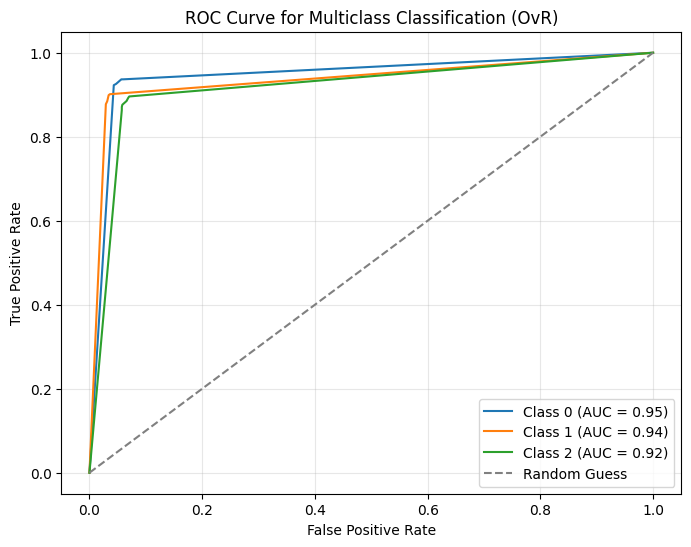

In [28]:
# Ensure classes are correctly labeled and binarized
n_classes = len(best_dt.classes_)  # Number of classes
y_test_bin = label_binarize(y_test, classes=best_dt.classes_)  # Binarize y_test

# Ensure probabilities are available for all classes
y_prob = best_dt.predict_proba(X_test)  # Predicted probabilities

# Plotting the ROC Curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])  # Compute FPR and TPR
    roc_auc = auc(fpr, tpr)  # Compute AUC
    plt.plot(fpr, tpr, label=f"Class {best_dt.classes_[i]} (AUC = {roc_auc:.2f})")

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Random Guess")

# Customize the plot
plt.title("ROC Curve for Multiclass Classification (OvR)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

**DecisionTree Insights**

The performance metrics are a bit different for the Decision Tree and its tuned variant; the original Decision Tree is slightly more accurate than the tuned model.

1. The accuracy differs from 91.04% to 90.61% indicating Decision tree before fine tuning is slightlty better.
2. Precision, recall, and F1-scores are consistent around 0.91 across both models, indicating that both models provide comparable reliability for classification tasks.
3. However, its performance lags behind the Random Forest, suggesting that ensemble methods remain more effective for this dataset.

In [32]:
#Calculating the feature importance for the target feature

clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(solar_data.drop(['InstallType','ID'],axis=1), solar_data['InstallType'])
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = solar_data.drop(['InstallType','ID'],axis=1).columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                      importance
DistSub_100_binned      0.205705
Percent_CAISO           0.190485
Substation_200          0.095653
Area                    0.059427
Percent_100             0.056731
Class                   0.056726
Length                  0.053929
HIFLD_200               0.046581
HIFLD_CAISO             0.045458
HIFLD_100               0.041923
DistSub_200_binned      0.036020
County                  0.024962
Substation_100          0.024593
SolarTech               0.016942
DistSub_CAISO_binned    0.015058
Substation_CAISO        0.013092
UrbanRural              0.009207
Percent_200             0.007508


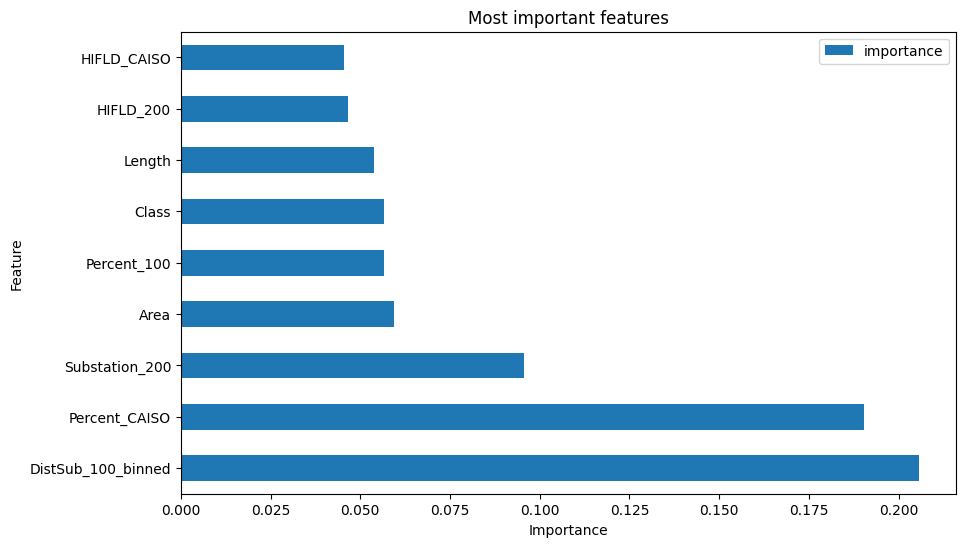

In [33]:
top_features = feature_importances.sort_values('importance', ascending=False).iloc[:9, :]

# Create a horizontal bar plot of the top 18 features
fig, ax = plt.subplots(figsize=(10, 6))
top_features.plot.barh(ax=ax)

# Set plot title and axis labels
ax.set_title('Most important features')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

# Show the plot
plt.show()